In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)

file = np.load('Features/i3d-features/RGBTest/Fast.Furious.6.2013__#01-03-25_01-04-59_label_B1-0-0__2.npy')
print(file.shape)
file2 = np.load('Features/vggish-features/test/Fast.Furious.6.2013__#01-03-25_01-04-59_label_B1-0-0__vggish.npy')
print(file2.shape)

              precision    recall  f1-score   support

      Normal       0.98      0.77      0.86   1792579
    Fighting       0.61      0.71      0.66    125428
    Shooting       0.25      0.71      0.37     37114
   Explosion       0.30      0.92      0.45     41542
        Riot       0.89      0.84      0.86    272294
       Abuse       0.02      0.72      0.05      3324
Car accident       0.27      0.83      0.40     58103

    accuracy                           0.78   2330384
   macro avg       0.48      0.78      0.52   2330384
weighted avg       0.91      0.78      0.83   2330384



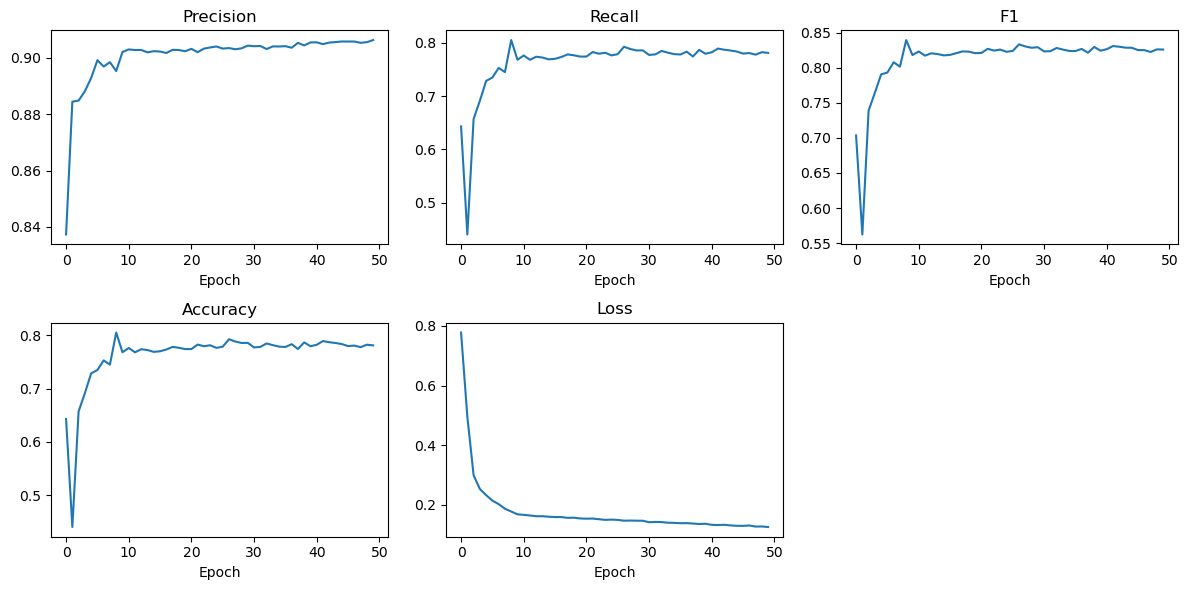

In [5]:
from matplotlib import pyplot as plt
import numpy as np

precision = np.load('ckpt/Binary Inverse Adam/precision_Binary_Inverse_Adam_50.npy')
recall = np.load('ckpt/Binary Inverse Adam/recall_Binary_Inverse_Adam_50.npy')
roc_auc = np.load('ckpt/Binary Inverse Adam/roc_auc_Binary_Inverse_Adam_50.npy')
f1 = np.load('ckpt/Binary Inverse Adam/f1_Binary_Inverse_Adam_50.npy')
accuracy = np.load('ckpt/Binary Inverse Adam/accuracy_Binary_Inverse_Adam_50.npy')
report = np.load('ckpt/Binary Inverse Adam/report_Binary_Inverse_Adam_50.npy', allow_pickle=True)
# print(f'Accuracy: {accuracy} \n F1: {f1} \n Precision: {precision} \n Recall: {recall} \n ROC AUC: {roc_auc} \n')
print(report[-1])

loss = np.load('ckpt/Binary Inverse Adam/train_losses_Binary_Inverse_Adam_50.npy')
# plt.plot(loss)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# Plot data on each subplot 
axes[0, 0].plot(precision)
axes[0, 0].set_title('Precision') 
axes[0, 0].set_xlabel('Epoch')
axes[0, 1].plot(recall)
axes[0, 1].set_title('Recall')
axes[0, 1].set_xlabel('Epoch')
axes[0, 2].plot(f1)
axes[0, 2].set_title('F1')
axes[0, 2].set_xlabel('Epoch')
axes[1, 0].plot(accuracy)
axes[1, 0].set_title('Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 1].plot(loss)
axes[1, 1].set_title('Loss')
axes[1, 1].set_xlabel('Epoch')
axes[1, 2].set_visible(False)

# Optional: Adjust spacing between subplots
fig.tight_layout()

plt.show()

In [6]:
import numpy as np
import os
import cv2

cap = cv2.VideoCapture(os.path.join('Features\Videos','Fast.Furious.6.2013__#01-03-25_01-04-59_label_B1-0-0.mp4'))
lens = int(cap.get(7))
print(lens)

2256


In [14]:
import numpy as np
import pandas as pd
import torch

labels = np.load('ckpt/all_data_labels.npy')
torch_labels = torch.tensor(labels, dtype=torch.int64) 

# Calculate class frequencies
class_counts = torch.bincount(torch_labels)
print(class_counts)

# Calculate inverse class frequencies
class_weights = 1.0 / class_counts
print(class_weights)

# Normalize weights
class_weights /= class_weights.sum()
print(class_weights)

# Calculate sample weights based on class imbalance
sample_weights = class_weights[torch_labels]
print(sample_weights)


tensor([10255,  2220,  1680,  1565,  1905,   180,  1965])
tensor([9.7513e-05, 4.5045e-04, 5.9524e-04, 6.3898e-04, 5.2493e-04, 5.5556e-03,
        5.0891e-04])
tensor([0.0116, 0.0538, 0.0711, 0.0763, 0.0627, 0.6636, 0.0608])
torch.Size([19770])
